In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
import importlib
import functions
import numpy as np
import json

In [6]:
from functions import gov_exp

In [7]:
importlib.reload(functions)
from functions import gov_exp

# OPTICAL FIELD

In [4]:
french_optical_brands = ['MARIUS MOREL',
 'JIMMY FAIRLY',
 'ALAIN AFFLELOU',
 'OPAL',
 "L'AMY",
 'HENRY JULLIEN',
 'ROUSSILHE',
 'PETIT LUNETIER']

international_optical_brands = ['MARIUS MOREL', 'JIMMY FAIRLY', 'ALAIN AFFLELOU', 'SAFILO-FRANCE', 'ESSILOR']

## Government spending on the entire optical sector

In [34]:
importlib.reload(functions)
from functions import gov_exp

In [35]:
optical = gov_exp(inflation_adjustment=True, sector="optical", mask={"OPTIQUE":["contains", "L_SC1", "and"]}, indent=0)

In [36]:
len(optical)

5

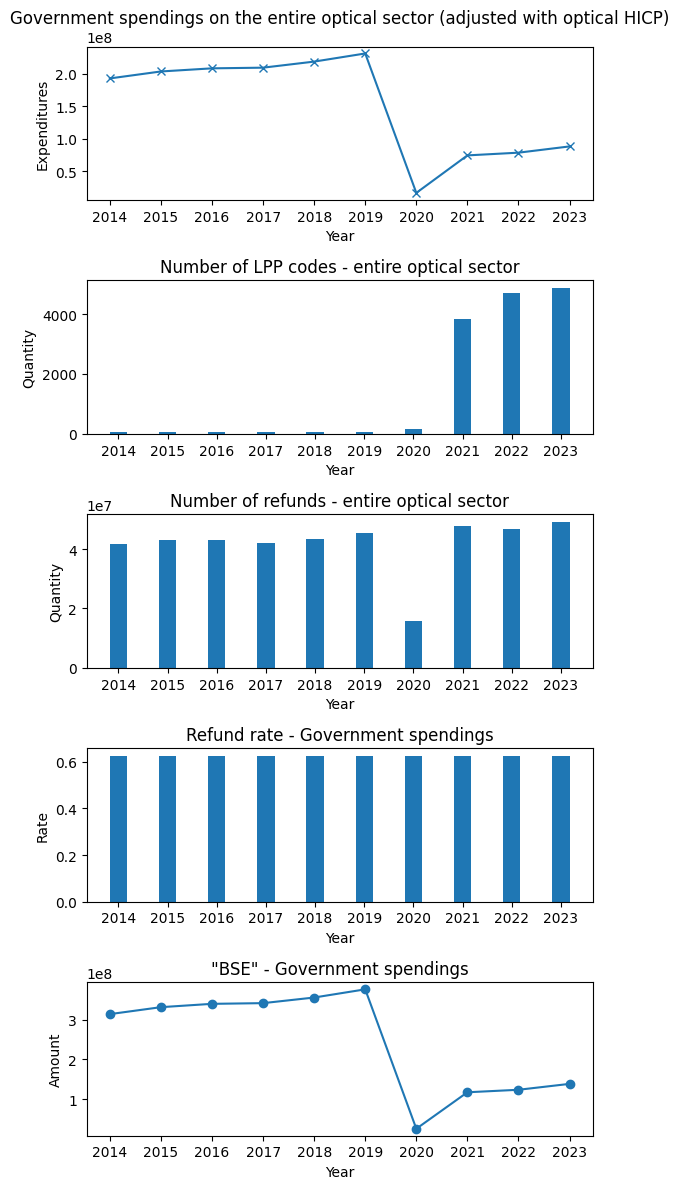

In [54]:
width = 0.35
list_years = np.array([int(year) for year in optical[0].keys()])
fig, axes = plt.subplots(5, 1, figsize=(6, 12))
axes = axes.flatten()

axes[0].plot(list_years, optical[0].values(), color="#1f77b4", marker="x")
axes[0].set_title(f'Government spendings on the entire optical sector (adjusted with optical HICP)')
axes[0].set_ylabel('Expenditures')

axes[1].bar(list_years, optical[1].values(), width=width, color="#1f77b4")
axes[1].set_title(f'Number of LPP codes - entire optical sector')
axes[1].set_ylabel('Quantity')

axes[2].bar(list_years, optical[2].values(), width=width, color="#1f77b4")
axes[2].set_title(f'Number of refunds - entire optical sector')
axes[2].set_ylabel('Quantity')

axes[3].bar(list_years, optical[3].values(), color="#1f77b4", width=width)
axes[3].set_title(f'Refund rate - Government spendings')
axes[3].set_ylabel('Rate')

axes[4].plot(list_years, optical[4].values(), color="#1f77b4", marker="o")
axes[4].set_title(f'"BSE" - Government spendings')
axes[4].set_ylabel('Amount')

for i in range(len(axes)):

    axes[i].set_xlabel('Year')
    axes[i].set_xticks(list_years)

plt.tight_layout()
plt.show()

In [15]:
optical[3]

{'2014': 0.6235304247062585,
 '2015': 0.6232128512347226,
 '2016': 0.6242100023069203,
 '2017': 0.6238578971440605,
 '2018': 0.6262229123917442,
 '2019': 0.6256900508097373,
 '2020': 0.6253654672233574,
 '2021': 0.6240411375882602,
 '2022': 0.6234056552781321,
 '2023': 0.6242126092082715}

We see that refund rate doesn't change a lot.

## DiD to take a look at the impact of 100% Santé on optical field "BSE"

In [43]:
control_group_1 = gov_exp(inflation_adjustment=False, sector="all", mask={"ORTHOPROTHESES(CHAP.7)":["equality", "L_SC1", "and"]}, indent=0)

In [44]:
list_years = [year for year in control_group_1[0].keys()]

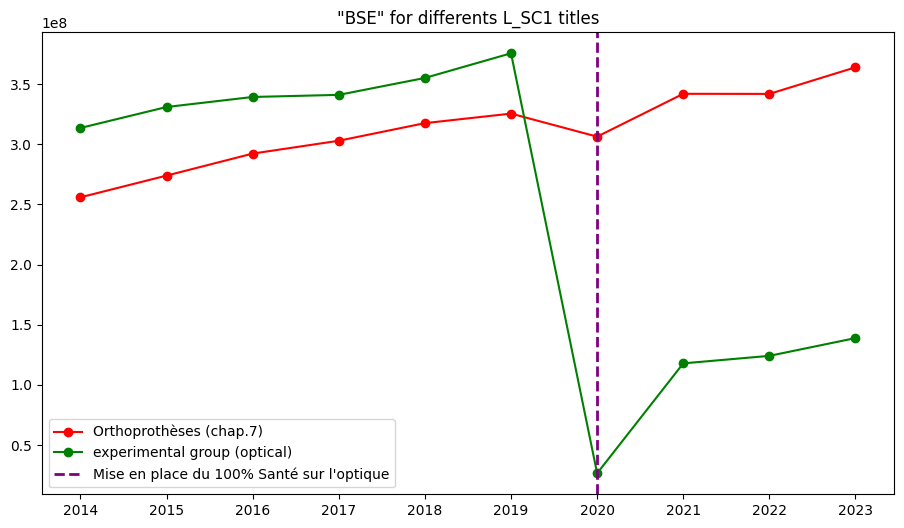

In [53]:
plt.figure(figsize=(11,6))

plt.plot(list_years, control_group_1[4].values(), marker="o", color="red", label = "Orthoprothèses (chap.7)")
plt.plot(list_years, optical[4].values(), marker="o", color="green", label="experimental group (optical)")

plt.axvline(x=6, color='purple', linestyle='--', linewidth=2, label="Mise en place du 100% Santé sur l'optique")

plt.title('"BSE" for differents L_SC1 titles')
plt.legend()

plt.show()

Now we see that BSE has been strongly impacted by 100% Santé, we suggest that all expenditures are now ensured by complementary insurances, because the demand didn't change a lot, we need to verify it by taking a look at DREES' data.

## Separation between frames and glasses

In [25]:
with open("../data/results/gov_exp_'VERRE(S)'_noclassA.json", 'r', encoding='utf-8') as f:
    v_o_noA = json.load(f)
with open("../data/results/gov_exp_'MONTURE'_noclassA.json", 'r', encoding='utf-8') as f:
    m_o_noA = json.load(f)
with open("../data/results/gov_exp_classA_glasses.json", 'r', encoding='utf-8') as f:
    classA_v_o = json.load(f)
with open("../data/results/gov_exp_classA_frames.json", 'r', encoding='utf-8') as f:
    classA_m_o = json.load(f)
with open("../data/results/gov_exp_'VERRE(S)'.json", 'r', encoding='utf-8') as f:
    v_o = json.load(f)
with open("../data/results/gov_exp_'MONTURE'.json", 'r', encoding='utf-8') as f:
    m_o = json.load(f)

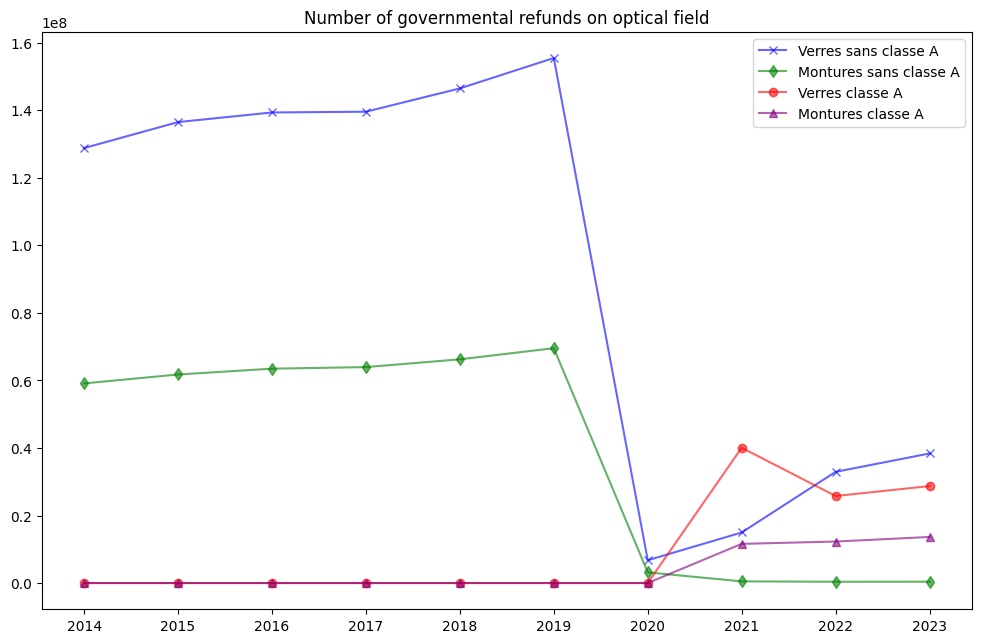

In [29]:
list_years = [year for year in classA_v_o[0].keys()]

plt.figure(figsize=(12,7.5))

plt.plot(list_years, v_o_noA[0].values(), marker="x", color="blue", label="Verres sans classe A", alpha=0.6)
plt.plot(list_years, m_o_noA[0].values(), marker="d", color="green", label="Montures sans classe A", alpha=0.6)
plt.plot(list_years, classA_v_o[0].values(), marker="o", color="red", label="Verres classe A", alpha=0.6)
plt.plot(list_years, classA_m_o[0].values(), marker="^", color="purple", label="Montures classe A", alpha=0.6)
#plt.plot(list_years, v_o[2].values(), marker="s", color="orange", label="Verres (tout)", alpha=0.6)
#plt.plot(list_years, m_o[2].values(), marker="*", color="brown", label="Montures (tout)", alpha=0.6)



plt.title("Number of governmental refunds on optical field")
plt.legend()

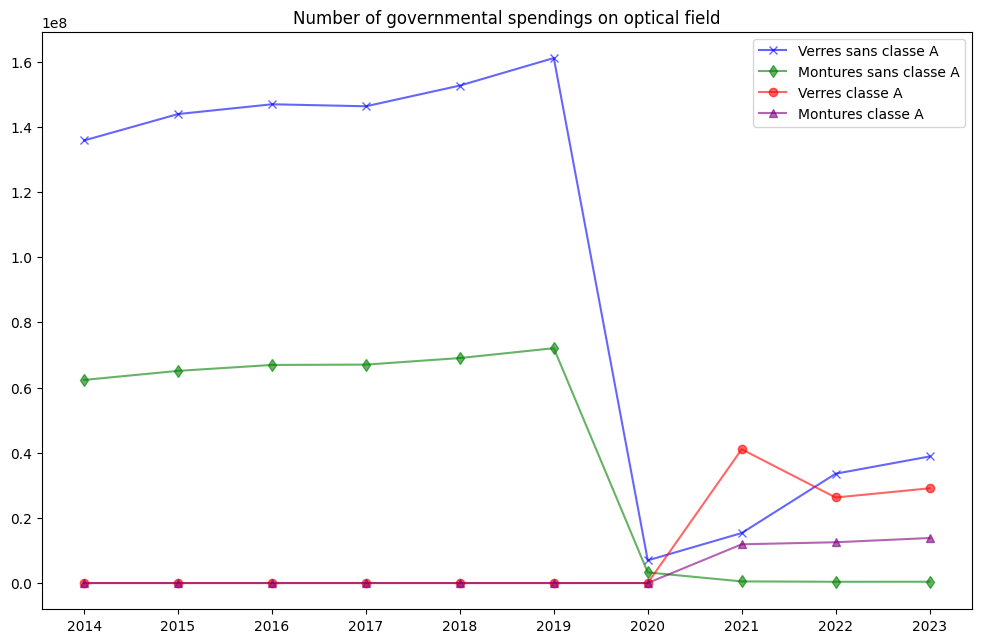

In [10]:
list_years = [year for year in classA_v_o[0].keys()]

plt.figure(figsize=(12,7.5))

plt.plot(list_years, v_o_noA[0].values(), marker="x", color="blue", label="Verres sans classe A", alpha=0.6)
plt.plot(list_years, m_o_noA[0].values(), marker="d", color="green", label="Montures sans classe A", alpha=0.6)
plt.plot(list_years, classA_v_o[0].values(), marker="o", color="red", label="Verres classe A", alpha=0.6)
plt.plot(list_years, classA_m_o[0].values(), marker="^", color="purple", label="Montures classe A", alpha=0.6)
#plt.plot(list_years, v_o[0].values(), marker="s", color="orange", label="Verres (tout)", alpha=0.6)
#plt.plot(list_years, m_o[0].values(), marker="*", color="brown", label="Montures (tout)", alpha=0.6)

plt.title("Number of governmental spendings on optical field")
plt.legend()

## Look at the base of refund, and the refund rate

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(9, 10))
axes = axes.flatten()

list_years = [year for year in classA_v_o[0].keys()]

plt.figure(figsize=(12,7.5))

plt.plot(list_years, v_o[0].values(), marker="x", color="blue", label="Verres sans classe A", alpha=0.6)
plt.plot(list_years, m_o[0].values(), marker="d", color="green", label="Montures sans classe A", alpha=0.6)
plt.plot(list_years, classA_v_o[0].values(), marker="o", color="red", label="Verres classe A", alpha=0.6)
plt.plot(list_years, classA_m_o[0].values(), marker="^", color="purple", label="Montures classe A", alpha=0.6)
#plt.plot(list_years, v_o[0].values(), marker="s", color="orange", label="Verres (tout)", alpha=0.6)
#plt.plot(list_years, m_o[0].values(), marker="*", color="brown", label="Montures (tout)", alpha=0.6)

plt.title("Number of governmental spendings on optical field")
plt.legend()

## Government expenditures for different french brands (class A compared to everything else) - Optical

In [7]:
import json
import numpy as np

In [9]:
with open('../data/gov_exp_for_different_french_brands_optical_field', 'r', encoding='utf-8') as f:
    dataC0 = json.load(f)
with open('../data/classA_gov_exp_for_different_french_brands_optical_field', 'r', encoding='utf-8') as f:
    dataCA = json.load(f)

list_years = np.array([int(year) for year in dataC0["MARIUS MOREL"][0].keys()])

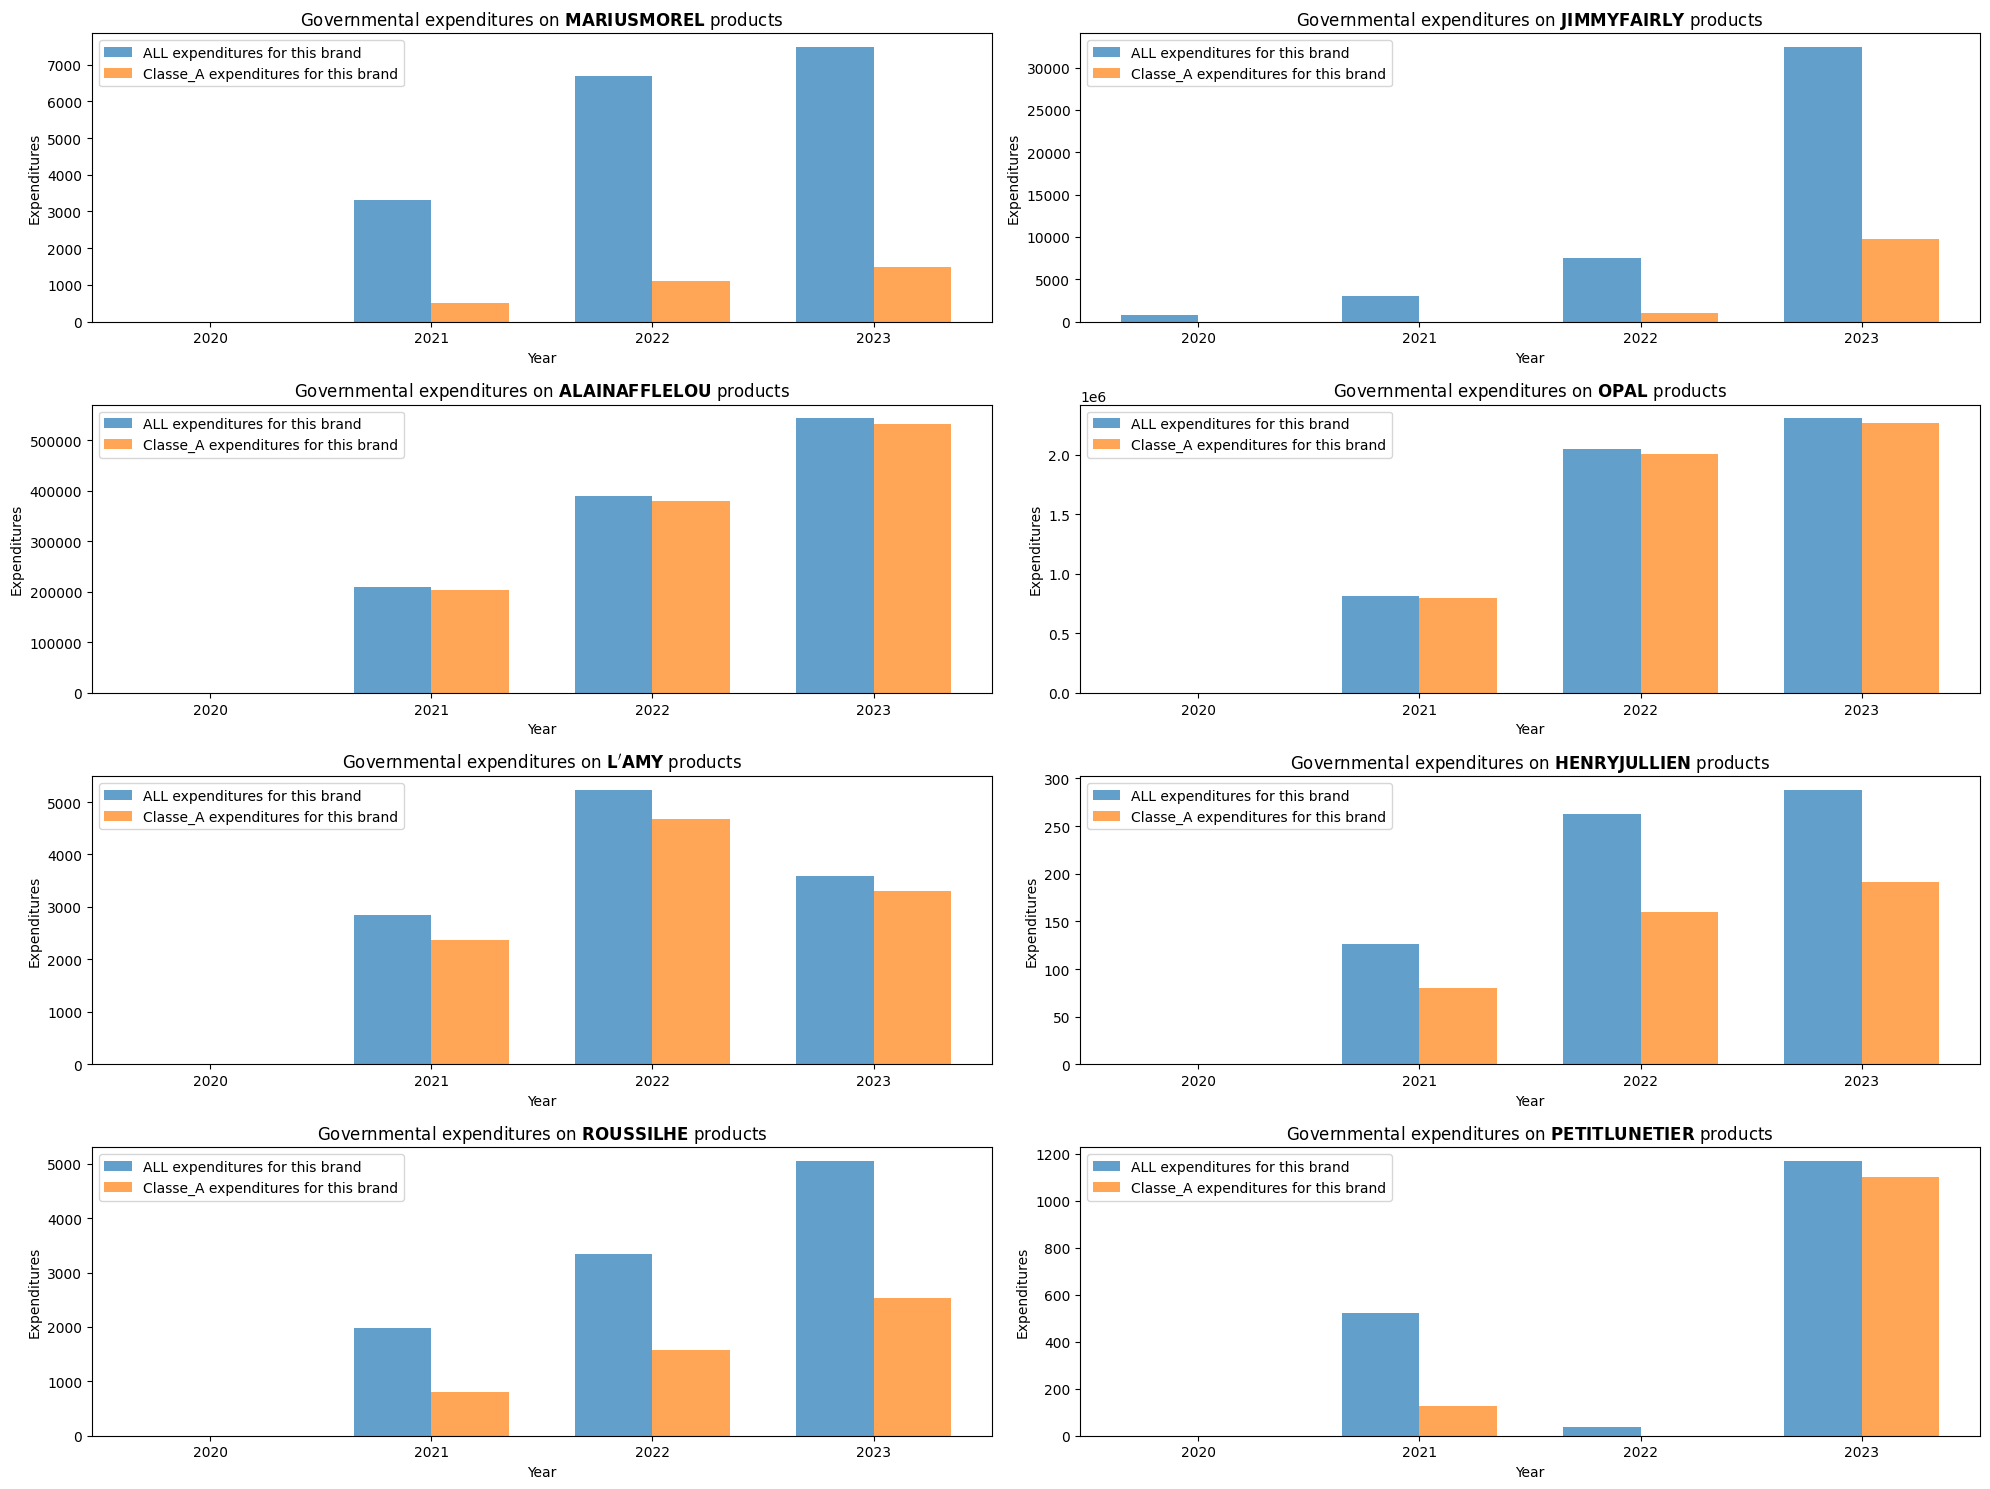

In [10]:
width = 0.35

fig, axes = plt.subplots(4, 2, figsize=(20, 15))

axes = axes.flatten()

count=0

for brand in french_optical_brands:

    axe = axes[count]
    axe.bar(list_years - width/2, dataC0[brand][0].values(), width=width, color="#1f77b4", label=f"ALL expenditures for this brand", alpha=0.7)
    axe.bar(list_years + width/2, dataCA[brand][0].values(), width=width, color="#ff7f0e", label=f"Classe_A expenditures for this brand", alpha=0.7)
    
    axe.set_title(f'Governmental expenditures on $\\mathbf{{{brand}}}$ products')
    axe.set_xlabel('Year')
    axe.set_ylabel('Expenditures')
    axe.legend()

    axe.set_xticks(list_years)  # Assure que seules les années entières sont utilisées comme labels
    #axe.set_xticklabels([str(int(year)) for year in list_years])  # Affiche les années entières
    
    count += 1

    plt.tight_layout()

plt.show()

This kind of results doesn't interest us a lot because we don't see any effect of the implementation of the 100% Santé plan.

Try to think to that next time.

## Number of refunds for different brands - Optical

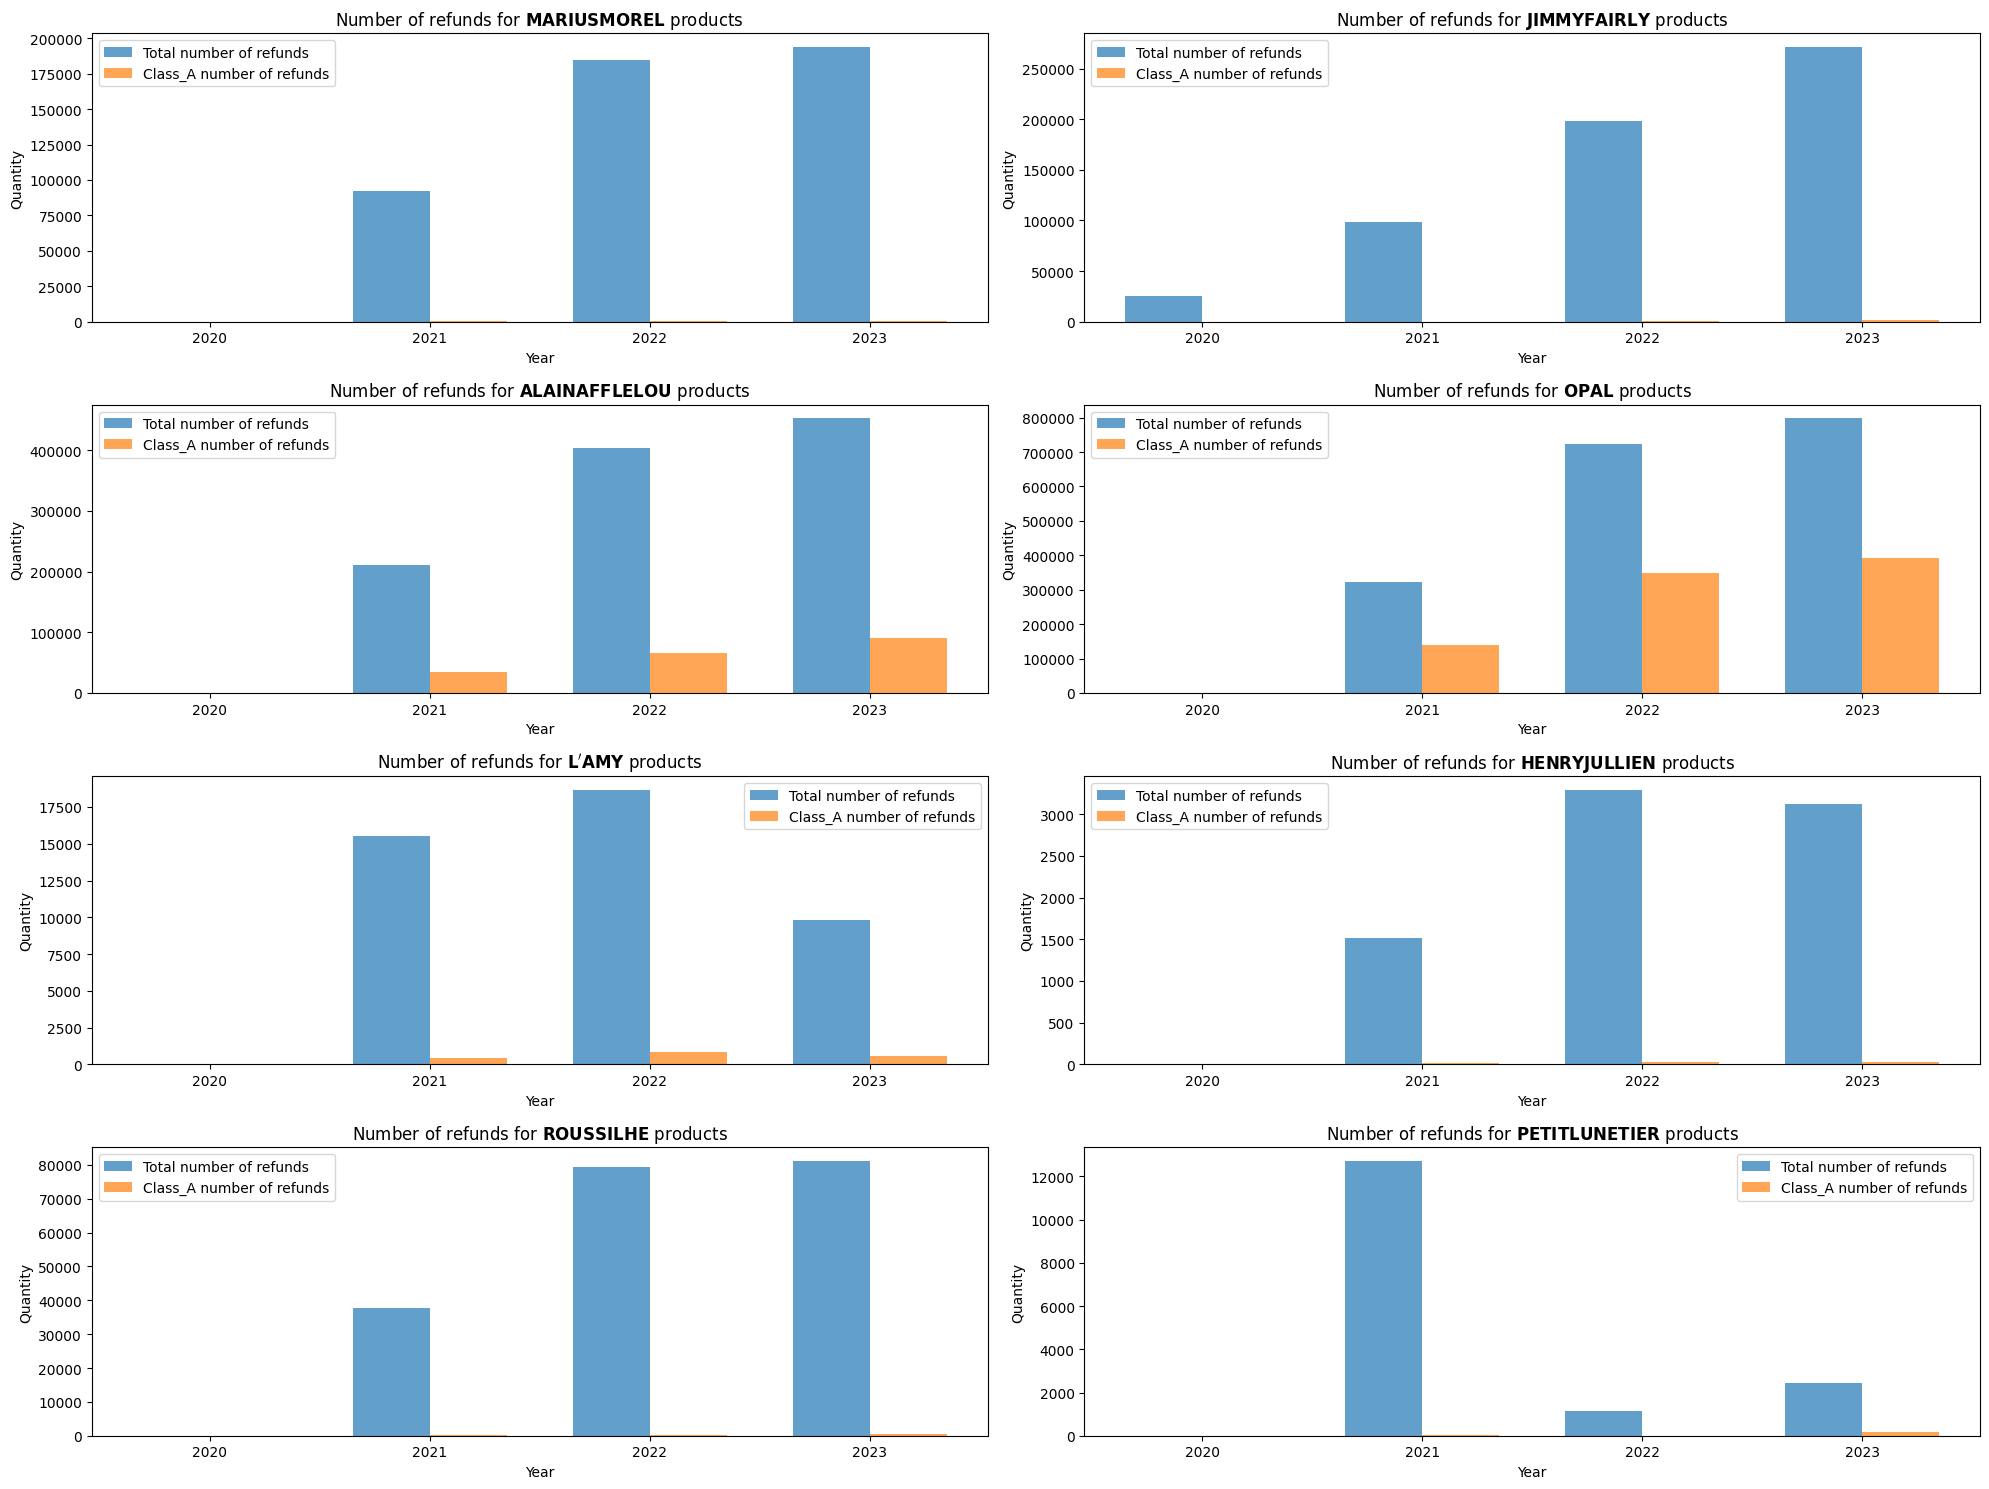

In [14]:
fig, axes = plt.subplots(4, 2, figsize=(20, 15))

axes = axes.flatten()

count=0

for brand in french_optical_brands:

    axe = axes[count]
    axe.bar(list_years - width/2, dataC0[brand][2].values(), width=width, color="#1f77b4", label=f"Total number of refunds", alpha=0.7)
    axe.bar(list_years + width/2, dataCA[brand][2].values(), width=width, color="#ff7f0e", label=f"Class_A number of refunds", alpha=0.7)
    
    axe.set_title(f'Number of refunds for $\\mathbf{{{brand}}}$ products')
    axe.set_xlabel('Year')
    axe.set_ylabel('Quantity')
    axe.legend()

    axe.set_xticks(list_years)  # ensure that only entire years are used as labels
    
    count += 1

    plt.tight_layout()

plt.show()

## Government expenditures for different international brands (class A compared to everything else) - Optical

In [12]:
import json
import numpy as np

In [25]:
with open('../data/gov_exp_for_different_international_brands_optical_field', 'r', encoding='utf-8') as f:
    dataC0 = json.load(f)
with open('../data/classA_gov_exp_for_different_international_brands_optical_field', 'r', encoding='utf-8') as f:
    dataCA = json.load(f)

list_years = np.array([int(year) for year in dataC0["MARIUS MOREL"][0].keys()])

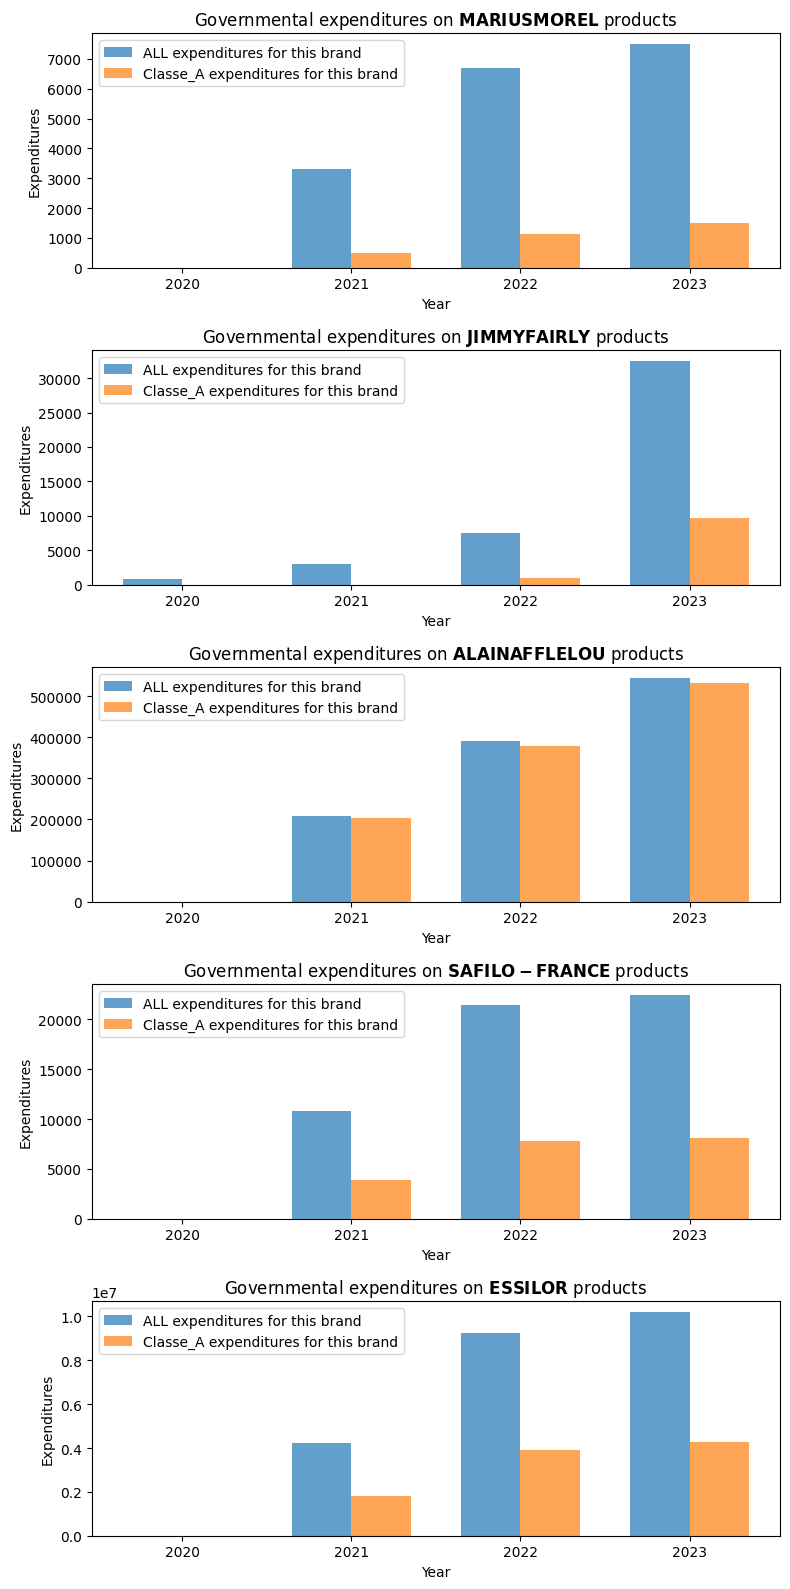

In [28]:
width = 0.35

fig, axes = plt.subplots(5, 1, figsize=(8, 16))

axes = axes.flatten()

count=0

for brand in international_optical_brands:

    axe = axes[count]
    axe.bar(list_years - width/2, dataC0[brand][0].values(), width=width, color="#1f77b4", label=f"ALL expenditures for this brand", alpha=0.7)
    axe.bar(list_years + width/2, dataCA[brand][0].values(), width=width, color="#ff7f0e", label=f"Classe_A expenditures for this brand", alpha=0.7)
    
    axe.set_title(f'Governmental expenditures on $\\mathbf{{{brand}}}$ products')
    axe.set_xlabel('Year')
    axe.set_ylabel('Expenditures')
    axe.legend()

    axe.set_xticks(list_years)  # Assure que seules les années entières sont utilisées comme labels
    #axe.set_xticklabels([str(int(year)) for year in list_years])  # Affiche les années entières
    
    count += 1

    plt.tight_layout()

plt.show()

## Number of refunds for different international brands - Optical

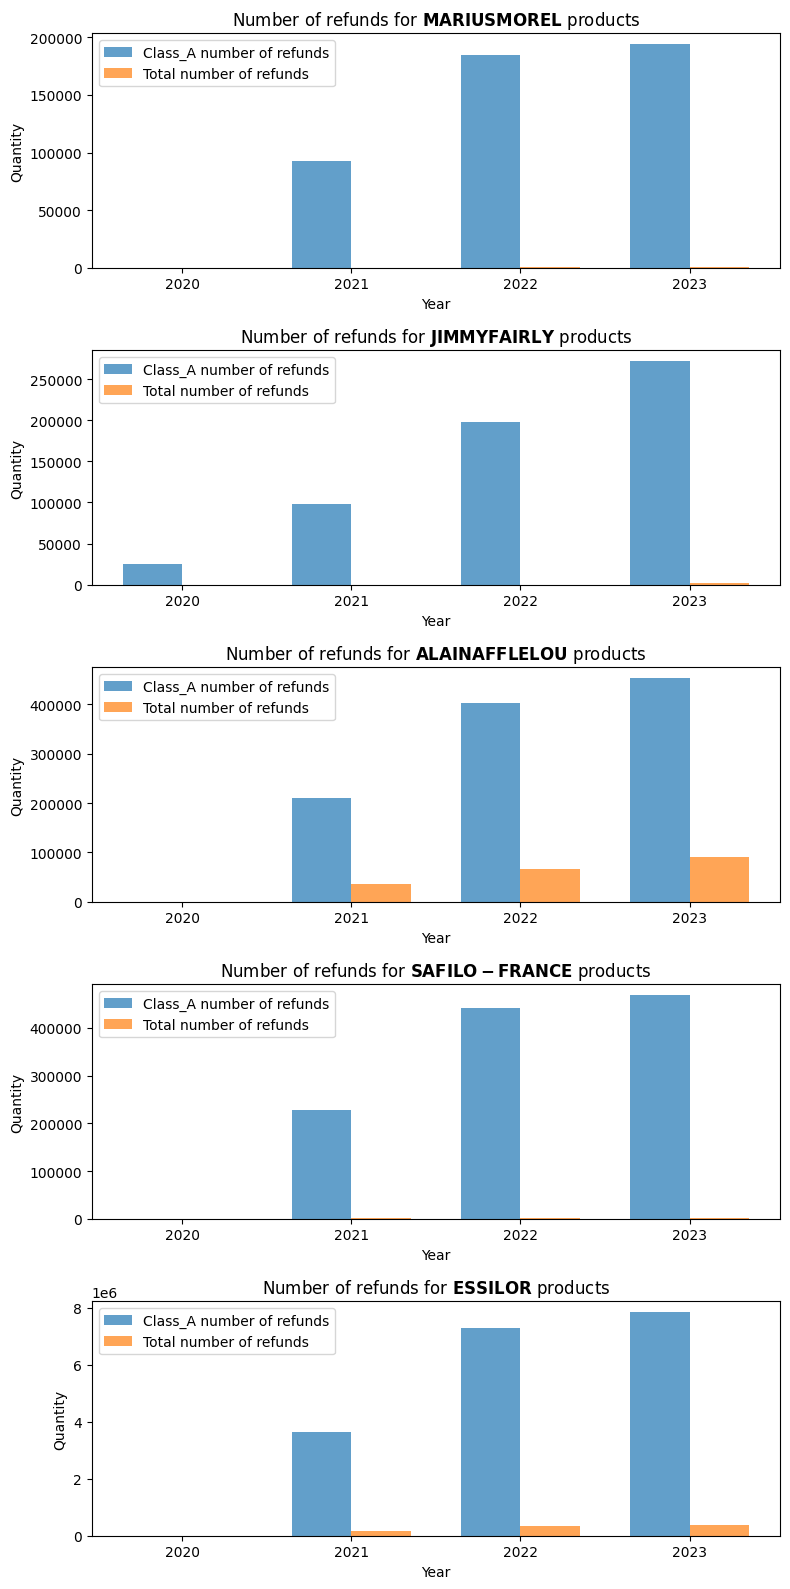

In [29]:
fig, axes = plt.subplots(5, 1, figsize=(8, 16))

axes = axes.flatten()

count=0

for brand in international_optical_brands:

    axe = axes[count]
    axe.bar(list_years - width/2, dataC0[brand][2].values(), width=width, color="#1f77b4", label=f"Class_A number of refunds", alpha=0.7)
    axe.bar(list_years + width/2, dataCA[brand][2].values(), width=width, color="#ff7f0e", label=f"Total number of refunds", alpha=0.7)
    
    axe.set_title(f'Number of refunds for $\\mathbf{{{brand}}}$ products')
    axe.set_xlabel('Year')
    axe.set_ylabel('Quantity')
    axe.legend()

    axe.set_xticks(list_years)  # ensure that only entire years are used as labels
    
    count += 1

    plt.tight_layout()

plt.show()

# HEARING FIELD

## Government spending on the entire hearing sector

In [18]:
hearing = gov_exp(inflation_adjustment=False, sector="hearing", mask={"DMI":["contains", "L_SC1", "or"]}, indent=0)

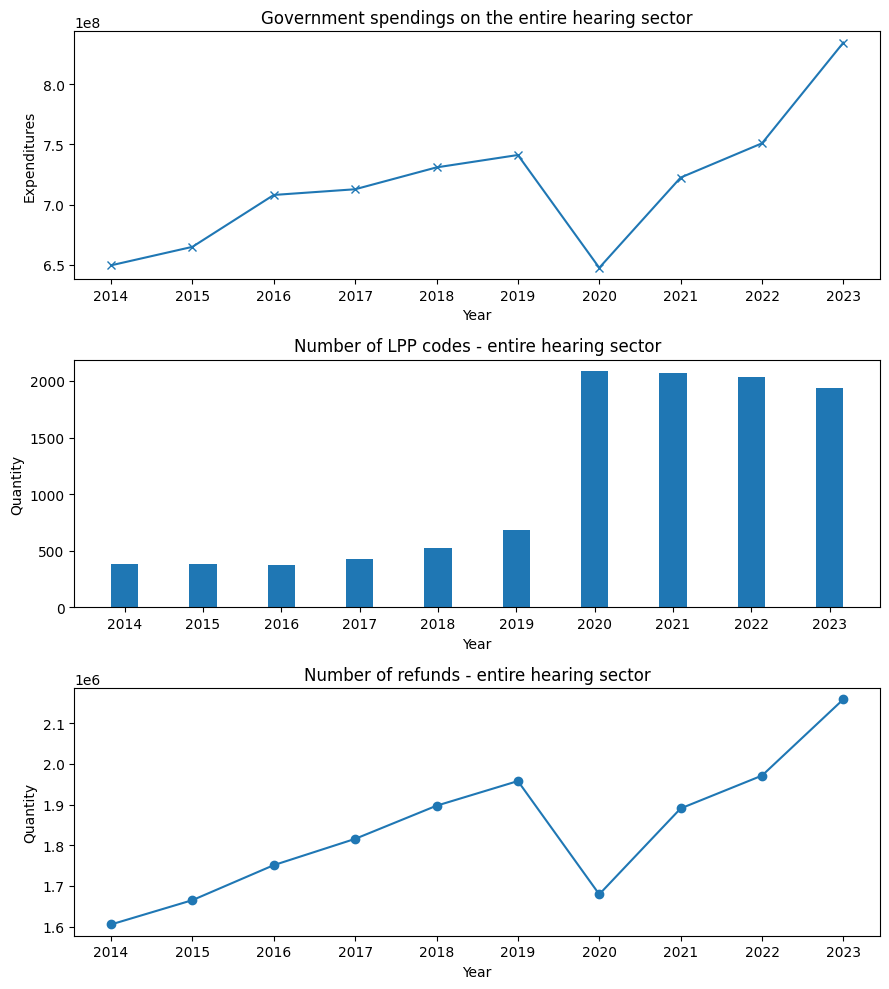

In [30]:
width = 0.35
list_years = np.array([int(year) for year in hearing[0].keys()])
fig, axes = plt.subplots(3, 1, figsize=(9, 10))
axes = axes.flatten()

axes[0].plot(list_years, hearing[0].values(), color="#1f77b4", marker="x")
axes[0].set_title(f'Government spendings on the entire hearing sector')
axes[0].set_ylabel("Expenditures")

axes[1].bar(list_years, hearing[1].values(), width=width, color="#1f77b4")
axes[1].set_title(f'Number of LPP codes - entire hearing sector')
axes[1].set_ylabel("Quantity")

axes[2].plot(list_years, hearing[2].values(), color="#1f77b4", marker='o')
axes[2].set_title(f'Number of refunds - entire hearing sector')
axes[2].set_ylabel("Quantity")

for i in range(len(axes)):
    axes[i].set_xlabel('Year')
    axes[i].set_xticks(list_years)

plt.tight_layout()
plt.show()

## Government expenditures for different brands (class I and class II) - Hearing

In [20]:
hearing_brands = ['STARKEY FRANCE', 'SONOVA FRANCE', 'PRODITION', 'WIDEX', 'SIVANTOS', 'GN HEARING SAS', 'BIOTONE TECH', 'SUPERVISION SAS', 'MEDISOUND', 'SIGNIA']

with open('../data/classI_gov_exp_for_different_brands_hearing_field', 'r', encoding='utf-8') as f:
    dataC1 = json.load(f)
with open('../data/classII_gov_exp_for_different_brands_hearing_field', 'r', encoding='utf-8') as f:
    dataC2 = json.load(f)

list_years = np.array([int(year) for year in dataC1["STARKEY FRANCE"][0].keys()])

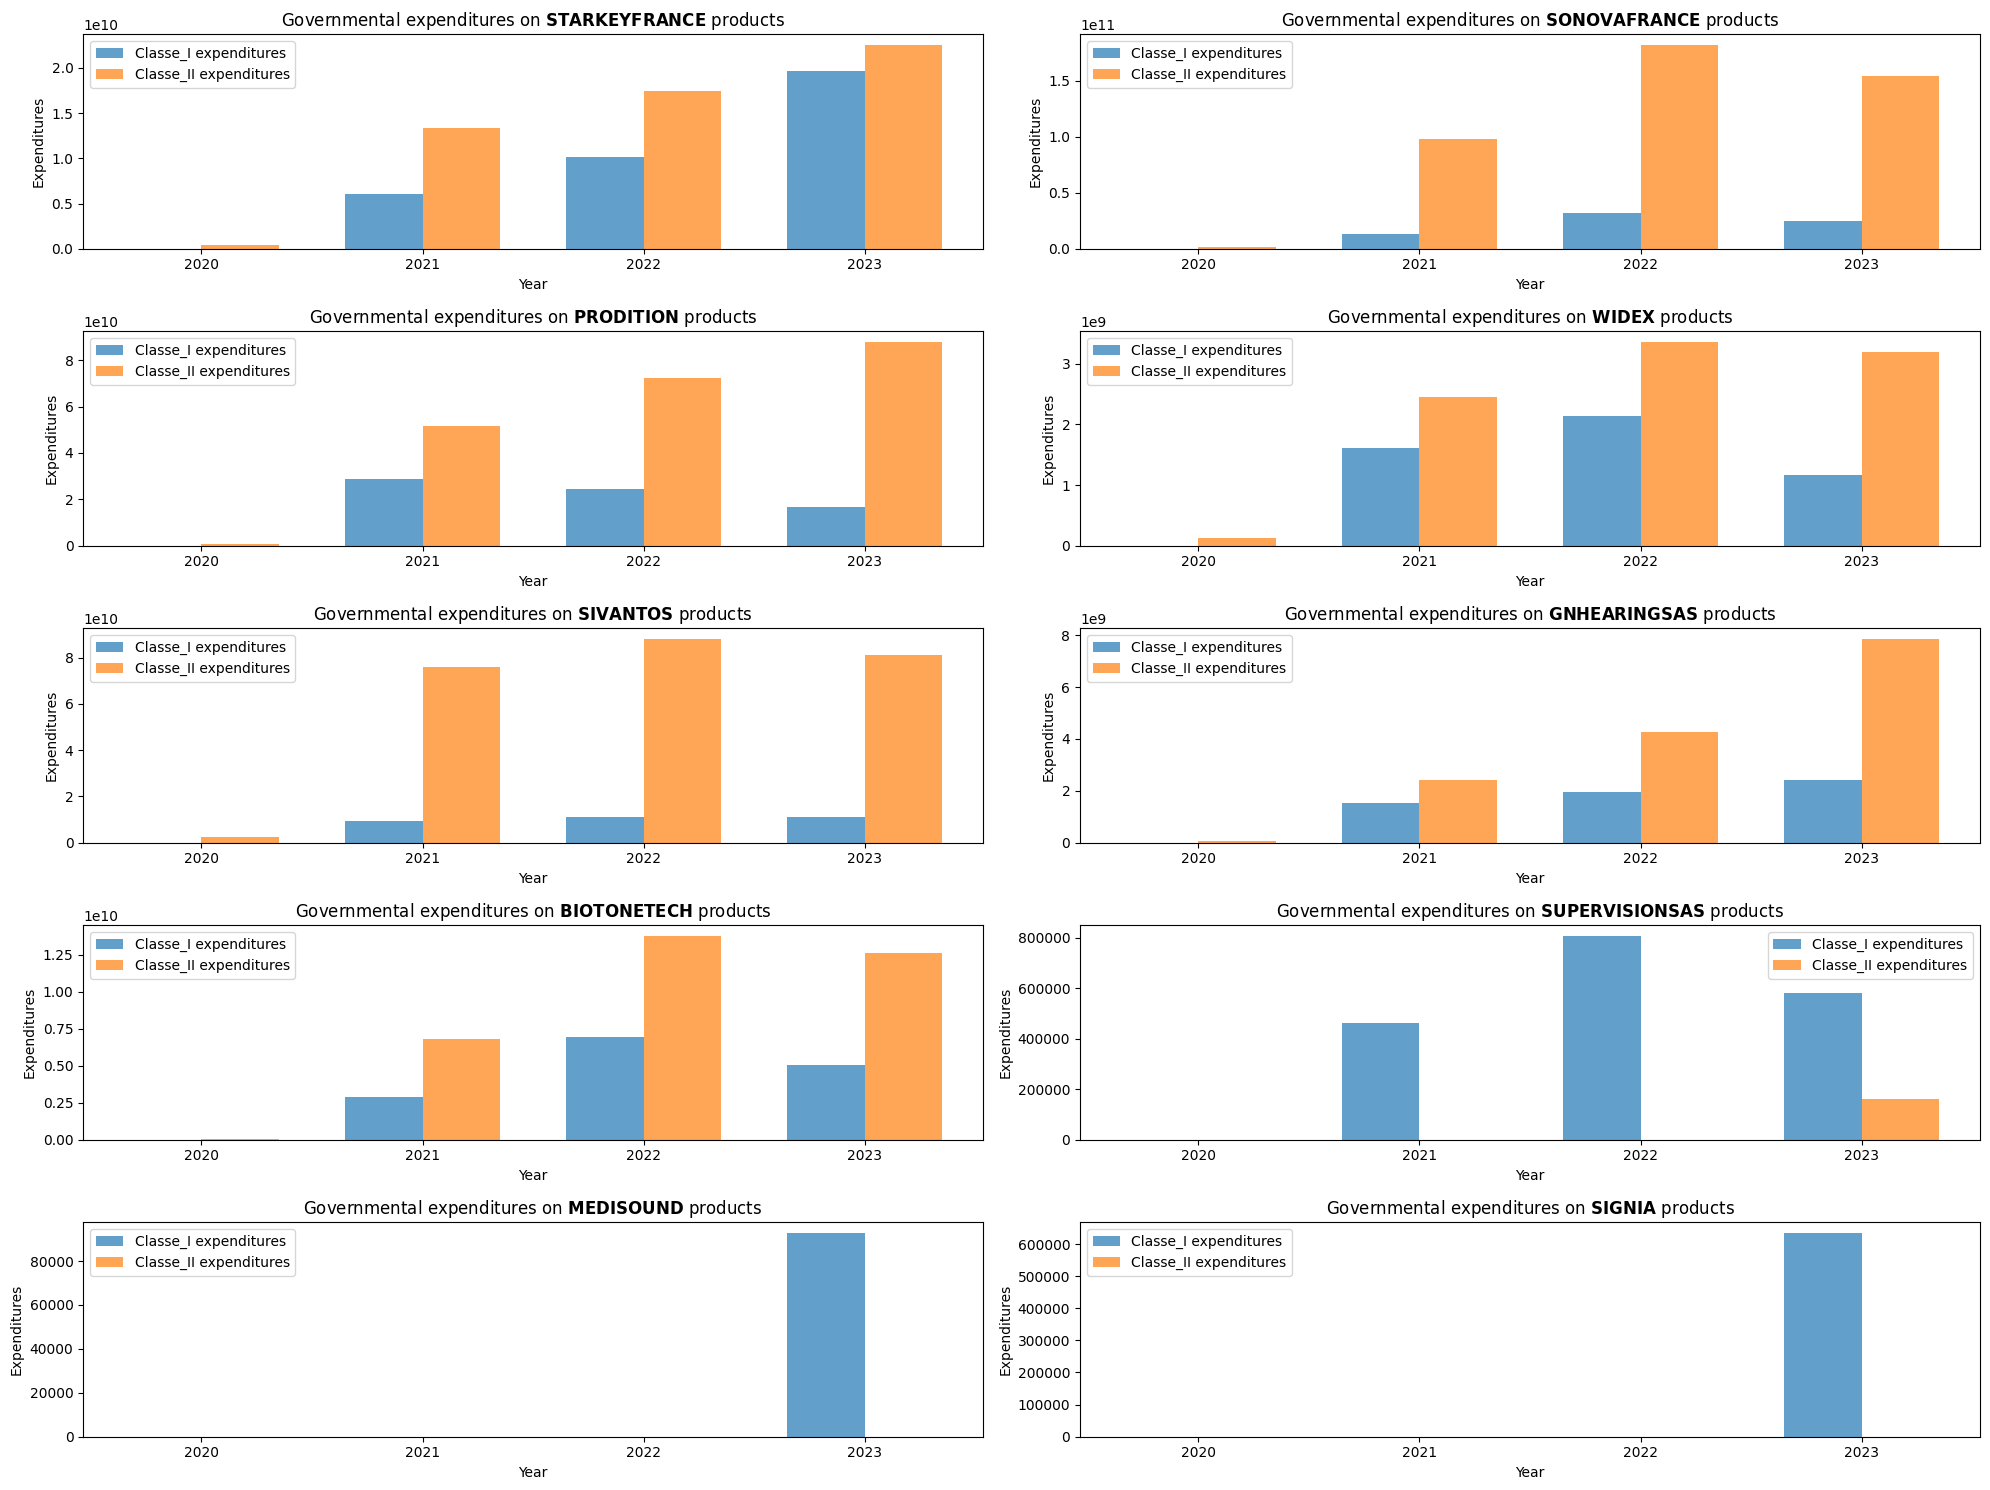

In [21]:
width = 0.35

fig, axes = plt.subplots(5, 2, figsize=(20, 15))

axes = axes.flatten()

count=0

for brand in hearing_brands:

    axe = axes[count]
    axe.bar(list_years - width/2, dataC1[brand][0].values(), width=width, color="#1f77b4", label=f"Classe_I expenditures", alpha=0.7)
    axe.bar(list_years + width/2, dataC2[brand][0].values(), width=width, color="#ff7f0e", label=f"Classe_II expenditures", alpha=0.7)
    
    axe.set_title(f'Governmental expenditures on $\\mathbf{{{brand}}}$ products')
    axe.set_xlabel('Year')
    axe.set_ylabel('Expenditures')
    axe.legend()

    axe.set_xticks(list_years)  # Assure que seules les années entières sont utilisées comme labels
    #axe.set_xticklabels([str(int(year)) for year in list_years])  # Affiche les années entières
    
    count += 1

    plt.tight_layout()

plt.show()

## Number of refunds for different brands (class I and class II) - Hearing

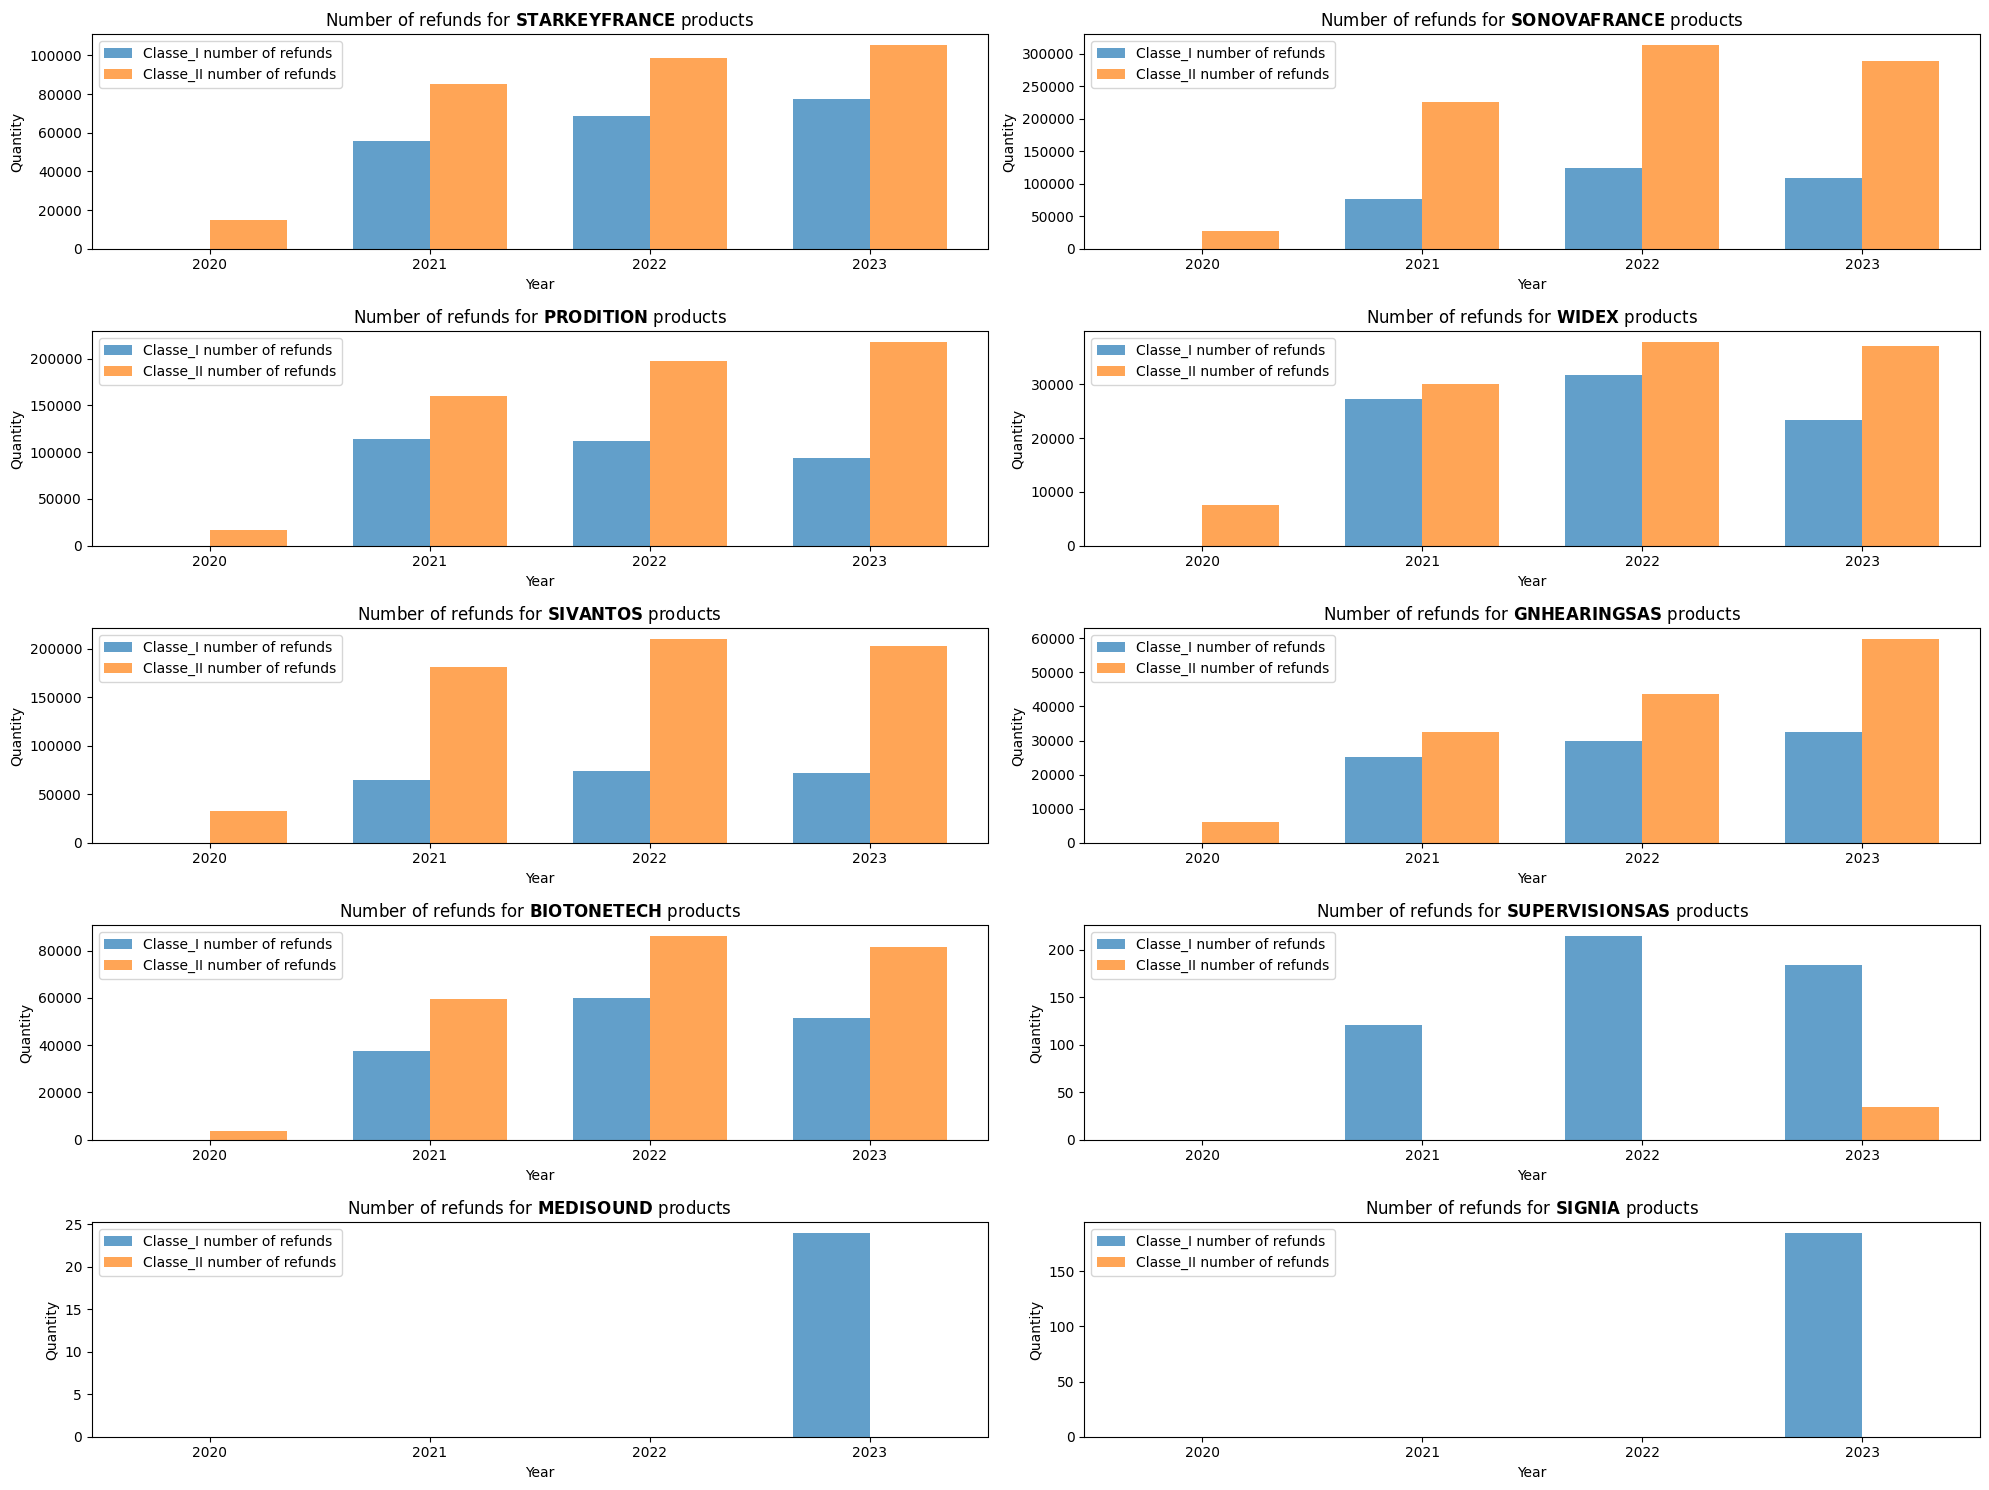

In [22]:
fig, axes = plt.subplots(5, 2, figsize=(20, 15))

axes = axes.flatten()

count=0

for brand in hearing_brands:

    axe = axes[count]
    axe.bar(list_years - width/2, dataC1[brand][2].values(), width=width, color="#1f77b4", label=f"Classe_I number of refunds", alpha=0.7)
    axe.bar(list_years + width/2, dataC2[brand][2].values(), width=width, color="#ff7f0e", label=f"Classe_II number of refunds", alpha=0.7)
    
    axe.set_title(f'Number of refunds for $\\mathbf{{{brand}}}$ products')
    axe.set_xlabel('Year')
    axe.set_ylabel('Quantity')
    axe.legend()

    axe.set_xticks(list_years)  # ensure that only entire years are used as labels
    
    count += 1

    plt.tight_layout()

plt.show()